# Álgebra Linear

Álgebra Linear é o ramo da matemática que lida com espaços vetoriais. Embora eu não tenha a esperança de ensinar álgebra linear em uma breve aula, ele sustenta um grande número de conceitos e técnicas de ciência de dados, o que significa que devo pelo menos tentar. O que aprendemos nesta aula usaremos intensamente em todo o restante do curso.

## Vetores

Abstratamente, *vetores* são objetos que podem ser somados (para formar novos vetores) e que podem ser multiplicados por *escalares* (ou seja, números), também para formar novos vetores.

Concretamente (para nós), vetores são pontos em algum espaço de dimensão finita. Embora você possa não pensar em seus dados como vetores, eles são uma boa maneira de representar dados numéricos.

Por exemplo, se você tiver as alturas, pesos e idades de um grande número de pessoas, poderá tratar seus dados como vetores tridimensionais `(altura, peso, idade)`. Se você está dando uma aula com quatro provas, pode tratar as notas dos alunos como vetores tridimensionais `(exame1, exame2, exame3, exame4)`.

A abordagem mais simples é representar vetores como listas de números. Uma lista de três números corresponde a um vetor no espaço tridimensional e vice-versa:

In [ ]:
height_weight_age = [70, # inches,
                     170, # pounds,
                     40 ] # years

grades = [95, # exam1
          80, # exam2
          75, # exam3
          62] # exam4

Um problema com essa abordagem é que desejaremos realizar operações aritméticas em vetores. Como as listas do Python não são vetores (e, portanto, não fornecem recursos para a aritmética vetorial), precisaremos criar essas ferramentas aritméticas por conta própria. Então vamos começar com isso.

Para começar, frequentemente precisamos adicionar dois vetores. Isto significa que se dois vetores `v` e `w` têm o mesmo comprimento, sua soma é apenas o vetor cujo primeiro elemento é `v[0] + w[0]`, cujo segundo elemento é `v[1] + w[1]`, e assim por diante. (Se eles não tiverem o mesmo tamanho, não podemos adicioná-los.)

Por exemplo, adicionar os vetores `[1, 2]` e `[2, 1]` resulta em `[1 + 2, 2 + 1]` ou `[3,3]`:

In [ ]:
matplotlib inline

O código abaixo apenas plota a representação gráfica da soma dos vetores `[1, 2]` e `[2, 1]`. Fique à vontade para modificar os valores de `v1` e `v2`.

In [ ]:
import matplotlib.pyplot as plt

v1 = [1, 2]
v2 = [2, 1]

v3 = [v1[0] + v2[0], v1[1] + v2[1]]

ax = plt.axes()

ax.arrow(0, 0, *v1, head_width=0.1, head_length=0.2, color='b')
plt.annotate("v1",xy=v1, xytext=(v1[0]/2,v1[1]/1.4))

ax.arrow(*v1, *v2, head_width=0.1, head_length=0.2, color='r')
xcoord = v1[0] + (v3[0]-v1[0])/2
ycoord = v1[1] + (v3[1]-v1[1])/1.5

plt.annotate("v2",xy=v3, xytext=(xcoord,ycoord))

ax.arrow(0, 0, *v3, head_width=0.1, head_length=0.3, color='k')
plt.annotate("v3",xy=v3, xytext=(v3[0]/2, v3[1]/2.4))

w = list(zip([0,0],v1,v2,v3))
plt.ylim(min(w[1])-1,max(w[1])+1)

plt.xlim(min(w[0])-1,max(w[0])+1)

plt.show()

Podemos facilmente implementar a soma e a subtração de vetores usando `zip` e compreensões de listas: 

In [ ]:
def vector_add(v, w):
    """adds corresponding elements"""
    return [v_i + w_i
        for v_i, w_i in zip(v, w)]

def vector_subtract(v, w):
    """subtracts corresponding elements"""
    return [v_i - w_i
        for v_i, w_i in zip(v, w)]

In [ ]:
vadd = vector_add(v1,v2)
vsub = vector_subtract(v1,v2)
print(vadd, vsub)

Às vezes, também queremos somar uma lista de vetores. Ou seja, criar um novo vetor cujo primeiro elemento é a soma de todos os primeiros elementos, cujo segundo elemento é a soma de todos os segundos elementos, e assim por diante. A maneira mais fácil de fazer isso é adicionando um vetor por vez:

In [ ]:
def vector_sum(vectors):
    """sums all corresponding elements"""
    result = vectors[0] # start with the first vector
    for vector in vectors[1:]: # then loop over the others
        result = vector_add(result, vector) # and add them to the result
    return result

In [ ]:
vlist = [[1,2,3], [4,5,6], [7,8,9]]
vsum = vector_sum(vlist)
print(vsum)

Se você pensar sobre o que acabamos de fazer, estamos apenas reduzindo a lista de vetores usando `vector_add`, o que significa que podemos reescrever isso mais rapidamente usando funções de ordem superior:

In [ ]:
from functools import reduce

def vector_sum2(vectors):
    return reduce(vector_add, vectors)

In [ ]:
vlist = [[1,2,3], [4,5,6], [7,8,9]]
vsum = vector_sum2(vlist)
print(vsum)

Em Python 3 não é recomendável mais que você use a função `reduce`. Em 99% dos casos é preferível usar um simples `for`, como fizemos acima.

Também precisaremos multiplicar um vetor por um escalar, o que fazemos simplesmente multiplicando cada elemento do vetor por esse número:

In [ ]:
def scalar_multiply(c, v):
    """c is a number, v is a vector"""
    return [c * v_i for v_i in v]

Isso nos permite calcular as médias dos componentes de uma lista de vetores (do mesmo tamanho):

In [ ]:
def vector_mean(vectors):
    """compute the vector whose ith element is the mean of the
    ith elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

No exemplo abaixo, cada vetor contém as notas das três provas que os alunos fizeram.

In [ ]:
notas = [[9,8.5,7], [7.5,5,6], [8,4.5,7.5]]
medias = vector_mean(notas)
print(medias)

Uma ferramenta menos óbvia é o *produto escalar*. O produto escalar de dois vetores **a** e **b** é a soma dos produtos entre cada elemento:

$$ \mathbf{a} \cdot \mathbf{b} = \sum_{i=1}^{n}a_{i}b_{i}=a_{1}b_{1}+a_{2}b_{2}+\cdots +a_{n}b_{n}$$ 

In [ ]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i
        for v_i, w_i in zip(v, w))

In [ ]:
v1 = [1, 2, 3]
v2 = [4, 5, 6]
vdot = dot(v1, v2)
print(vdot)

Usando isso, é fácil calcular a *soma dos quadrados* de um vetor, ou $\sum_{i=1}^n{v_i^2}$:

In [ ]:
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

Podemos usar a função acima para computar a sua *magnitude* (ou comprimento, ou norma), dada por $||v|| = \sqrt{\sum_{i=1}^n{v_i^2}}$ e pelo código:

In [ ]:
import math
    
def magnitude(v):
    return math.sqrt(sum_of_squares(v)) # math.sqrt é a função que calcula a raiz quadrada

Note que dado um vetor $v$ e outro $u$ de mesma magnitude, o produtor escalar $v \cdot u$ será maior (menor) à medida em que as dimensões relevantes para $u$ forem relevantes (irrelevantes) para $v$:

In [ ]:
v1 = [0, 1, 2]
v2 = [0, 2, 1]
v3 = [2, 0, 1]
v4 = [2, 1, 0]
print("v1 . v1:", dot(v1,v1))
print("v1 . v2:", dot(v1,v2))
print("v1 . v3:", dot(v1,v3))
print("v1 . v3:", dot(v1,v4))

A partir da magnitude, podemos também calcular o produto escalar a partir da sua representação geométrica:

$$\mathbf {a} \cdot \mathbf {b} =\|\mathbf {a} \|\ \|\mathbf {b} \|\cos(\theta )$$

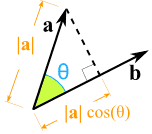

O produto escalar mede até que ponto o vetor `v` se estende na direção `w`. Por exemplo, se w = `[1, 0]`, então, `dot(v, w)` (ou $ \mathbf{v} \cdot \mathbf{w} $)  é apenas o primeiro componente de `v`. Outra maneira de dizer isso é que o produto escalar é o comprimento do vetor que você obteria se projetasse $v \cdot w$ em $w$.

In [ ]:
import matplotlib.pyplot as plt

v = [1, 2]
w = [2, 1]

dotP = dot(v,w)
print("v.w = ", dotP)
unit_w = scalar_multiply(1/magnitude(w),w)
wExt = scalar_multiply(dotP,w)

ax = plt.axes()

ax.arrow(0, 0, *v, head_width=0.1, head_length=0.1, color='b')
plt.annotate("v",xy=v, xytext=scalar_multiply(5, v), textcoords='offset points')

ax.arrow(0, 0, *w, head_width=0.1, head_length=0.1, color='r')
plt.annotate("w",xy=w, xytext=scalar_multiply(5, w), textcoords='offset points')

ax.arrow(0, 0, *wExt, head_width=0.05, head_length=0.1, color='r')
plt.annotate("(w.v)w",xy=wExt, xytext=scalar_multiply(2, wExt), textcoords='offset points')

dx = wExt[0] - v[0]
dy = wExt[1] - v[1]
ax.arrow(*v, dx, dy, head_width=0.1, head_length=0.05, color='b', linestyle=':')

w = list(zip([0,0],v,w,wExt))
plt.ylim(min(w[1])-1,max(w[1])+1)
plt.xlim(min(w[0])-1,max(w[0])+1)
plt.gca().set_aspect('equal')


plt.show()

Observe novamente a figura abaixo:

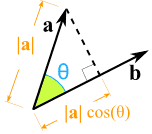

O termo $\|\mathbf{a}\| \cos(\theta)$ é a projeção $proj_\mathbf{b} \mathbf{a}$ do vetor $\mathbf{a}$ em $\mathbf{b}$. 

$$proj_\mathbf{b} \mathbf{a} = \|\mathbf{a}\| \cos(\theta)$$

Esta projeção é equivalente à sombra produzida por $\mathbf{a}$ em $\mathbf{b}$ sobre o efeito de um feixo de luz perpendicular a $\mathbf{b}$.



De forma bem intuitiva e simples, imagine que há uma corrida na direção de $\mathbf{b}$. No entanto, você acelera o seu carro com uma força equivalente a $\|\mathbf{a}\|$ na direção $\mathbf{a}$. A projeção $proj_\mathbf{b} \mathbf{a}$ de $\mathbf{a}$ em $\mathbf{b}$ nos diz qual é a força que você está fazendo para ganhar a corrida, ou seja, qual é a força na direção $\mathbf{b}$.

Se não sabemos o ângulo $\theta$, podemos usar o produto escalar para calcular a projeção de $\mathbf{a}$ em $\mathbf{b}$. Sabemos que:

$$\mathbf {a} \cdot \mathbf {b} =\|\mathbf {a} \|\ \|\mathbf {b} \|\cos(\theta )$$

e que: 

$$proj_\mathbf{b} \mathbf{a} = \|\mathbf{a}\| \cos(\theta)$$

Então, substituindo a segunda na primeira:

$$\mathbf {a} \cdot \mathbf {b} =\ \|\mathbf {b}\|\ proj_\mathbf{b} \mathbf{a} $$

Ou:

$$proj_\mathbf{b} \mathbf{a} =\ \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf {b}\|}$$

$proj_\mathbf{b} \mathbf{a}$ nos dá a magnitude da projeção. Se quisermos o vetor $\mathbf{a_b}$ correspondente, precisamos multiplicar $proj_\mathbf{b} \mathbf{a}$ pelo vetor unitário na direção de $\mathbf{b}$:

$$\mathbf{a_b} = proj_\mathbf{b} \mathbf{a} ~ \frac{\mathbf{b}}{\|b\|}$$

Com uma simples manipulação algébrica, podemos ver também que:

$$proj_\mathbf{b} \mathbf{a} =\ \mathbf{a} \cdot \frac{\mathbf{b}}{\|\mathbf {b}\|}$$

In [ ]:
import matplotlib.pyplot as plt

v = [1, 2]
w = [2, 1]

dotP = dot(v,w)
unit_w = scalar_multiply(1/magnitude(w),w)
wExt = scalar_multiply(dotP/magnitude(w),unit_w)

#outra forma:
#dotP = dot(v,scalar_multiply(1/magnitude(w),w))
#unit_w = scalar_multiply(1/magnitude(w),w)
#wExt = scalar_multiply(dotP,unit_w)



ax = plt.axes()

ax.arrow(0, 0, *v, head_width=0.1, head_length=0.1, color='b')
plt.annotate("v",xy=v, xytext=scalar_multiply(5, v), textcoords='offset points')

ax.arrow(0, 0, *w, head_width=0.1, head_length=0.1, color='r')
plt.annotate("w",xy=w, xytext=scalar_multiply(5, w), textcoords='offset points')

ax.arrow(0, 0, *wExt, head_width=0.05, head_length=0.1, color='r')
plt.annotate("$proj_w v$",xy=wExt, xytext=scalar_multiply(2, wExt), textcoords='offset points')

dx = wExt[0] - v[0]
dy = wExt[1] - v[1]
ax.arrow(*v, dx, dy, head_width=0.1, head_length=0.05, color='b', linestyle=':')

w = list(zip([0,0],v,w,wExt))
plt.ylim(min(w[1])-1,max(w[1])+1)
plt.xlim(min(w[0])-1,max(w[0])+1)
plt.gca().set_aspect('equal')


plt.show()

Para mais detalhes, assista a este [vídeo](https://www.youtube.com/watch?v=_f_6jUdnEFQ) ou leia este [texto](https://betterexplained.com/articles/vector-calculus-understanding-the-dot-product/).

Agora temos todas as peças que precisamos para calcular a distância Euclidiana $d(\mathbf{v}, \mathbf{w})$ entre dois vetores $\mathbf{v}$ e $\mathbf{w}$, que é definida como:

$$\sqrt{(v_1-w_1)^2 + \cdots + (v_n-w_n)^2}$$

In [ ]:
def squared_distance(v, w):
    """(v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return math.sqrt(squared_distance(v, w))

Que pode ser definida pela função `distance` acima ou pela `distance2` abaixo:

In [ ]:
def distance2(v, w):
    return magnitude(vector_subtract(v, w))

Podemos também calcular a similaridade entre dois vetores $\mathbf{v}$ e $\mathbf{w}$ através da métrica *similaridade de cosseno*, que é basicamente o cosseno do ângulo $\theta$ entre $\mathbf{v}$ e $\mathbf{w}$.

Lembre que o produto escalar entre dois vetores $\mathbf{v}$ e $\mathbf{w}$ é dado por:

$$\mathbf {v} \cdot \mathbf {w} =\|\mathbf {v} \|\ \|\mathbf {w} \|\cos(\theta )$$

Então:

$${\text{similaridade}}=\cos(\theta )={\mathbf {v} \cdot \mathbf {w} \over \|\mathbf {v} \|\|\mathbf {w} \|}={\frac {\sum \limits _{i=1}^{n}{v_{i}w_{i}}}{{\sqrt {\sum \limits _{i=1}^{n}{v_{i}^{2}}}}{\sqrt {\sum \limits _{i=1}^{n}{w_{i}^{2}}}}}}$$


In [ ]:
def cosine_similarity(v, w):
    return dot(v, w) / math.sqrt(dot(v, v) * dot(w, w))

A partir da medida acima, podemos calcular também a distância de cosseno entre dois vetores $\mathbf{v}$ e $\mathbf{w}$, que é dada por $1 - \cos(\theta)$, ou $1$ menos a similaridade de cosseno entre os vetores:

In [ ]:
def cosine_distance(v, w):
    return 1 - cosine_similarity(v,w)

Vamos pensar um pouco mais sobre a distância euclidiane e a de cosseno. Considere as pessoas abaixo com os seus respectivos pesos e alturas:

In [ ]:
joao = [85, 180]
maria = [65, 179]
bob = [63, 133]

Quais são as pessoas mais similares e mais diferentes?

In [ ]:
print(cosine_distance(joao, maria))
print(cosine_distance(joao, bob))
print(cosine_distance(maria, bob))

print()
print(distance(joao, maria))
print(distance(joao, bob))
print(distance(maria, bob))

## Matrizes

Uma matriz é uma coleção bidimensional de números. Nós representamos as matrizes como listas de listas, com cada lista interna tendo o mesmo tamanho e correspondendo a uma linha da matriz. Se `A` é uma matriz, então `A[i][j]` é o elemento na i-ésima linha e na j-ésima coluna. Por convenção matemática, normalmente usamos letras maiúsculas para representar matrizes. Por exemplo:

In [ ]:
A = [[1, 2, 3], # A tem 2 linhas e 3 colunas
    [4, 5, 6]]

B = [[1, 2], # B tem 3 linhas e 2 colunas
     [3, 4],
     [5, 6]]


Na matemática, você normalmente nomearia a primeira linha da matriz de "linha 1" e a primeira coluna de "coluna 1". Como estamos representando matrizes com listas do Python, que são indexadas a partir do zero, chamaremos a primeira linha de uma matriz de "linha 0" e a primeira coluna de "coluna 0."

Dada essa representação de lista de listas, a matriz `A` possui `len(A)` linhas e `len(A[0])` colunas, que consideramos como sendo a sua forma, ou `shape`:

In [ ]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

In [ ]:
print(shape(A), shape(B))

Se uma matriz tiver `n` linhas e `k` colunas, iremos nos referir a ela como uma matriz `n × k`. Podemos (e às vezes iremos) pensar em cada linha de uma matriz `n × k` como um vetor de comprimento `k`, e cada coluna como um vetor de comprimento `n`:

In [ ]:
def get_row(A, i):
    return A[i]               # A[i] já é a i-esima linha

def get_column(A, j):
    return [A_i[j]            # j-esimo elemento da linha A_i
        for A_i in A]         # for each row A_i



In [ ]:
print(get_row(A, 1), get_column(B,1))

Também podemos poder criar uma matriz dada sua forma e uma função para gerar seus elementos. Podemos fazer isso usando uma compreensão de lista aninhada:

In [ ]:
def zeroValue(i, j):
    return 0

def make_matrix(num_rows, num_cols, entry_fn=zeroValue):
    """returns a num_rows x num_cols matrix
    whose (i,j)th entry is entry_fn(i, j)"""
    
    return [[entry_fn(i, j)              # given i, create a list
             for j in range(num_cols)]   # [entry_fn(i, 0), ... ]
            for i in range(num_rows)]    # create one list for each i

Dada esta função, você pode criar uma matriz identidade `5 × 5` (com `1`s na diagonal e `0`s nas outras posições) com:

In [ ]:
def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0

identity_matrix = make_matrix(5, 5, is_diagonal)

print(identity_matrix)

Matrizes serão importantes para nós por várias razões.

Primeiro, podemos usar uma matriz para representar um conjunto de dados que consiste em múltiplos vetores, simplesmente considerando cada vetor como uma linha da matriz. Por exemplo, se você tivesse as alturas, pesos e idades de 1.000 pessoas, poderia colocá-las em uma matriz de `1000 × 3`:


In [ ]:
data = [[70, 170, 40],
         [65, 120, 26],
         [77, 250, 19],
         # ....
        ]

Segundo, como veremos mais adiante, podemos usar uma matriz `n × k` para representar uma função linear que mapeia vetores de dimensão `k` para vetores `n` dimensionais. Várias de nossas técnicas e conceitos envolverão essas funções.

Em terceiro lugar, as matrizes podem ser usadas para representar relacionamentos binários. Na Aula 1, representamos as arestas de uma rede como uma coleção de pares `(i, j)`. Uma representação alternativa seria criar uma matriz `A` tal que `A[i][j]` seja `1` se os nós `i` e `j` estiverem conectados e `0` caso contrário.

Lembre-se que antes nós tivemos:

In [ ]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

Poderíamos também representar esses relacionamentos como:

In [ ]:
    #     user  0  1  2  3  4  5  6  7  8  9
    #
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # usuario 0
               [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # usuario 1
               [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # usuario 2
               [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # usuario 3
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # usuario 4
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # usuario 5
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # usuario 6
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # usuario 7
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # usuario 8
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # usuario 9

Se houverem poucas conexões, essa é uma representação muito mais ineficiente, já que você acaba tendo que armazenar muitos zeros. No entanto, com a representação da matriz, é muito mais rápido verificar se dois nós estão conectados - você só precisa fazer uma pesquisa de matriz em vez de (potencialmente) inspecionar cada aresta:

In [ ]:
import random

friendships[0][2] == 1 # Verdadeiro, 0 e 2 são amigos
friendships[0][8] == 1 # Falso, 0 e 8 não são amigos

user1 = random.randint(0,9)
user2 = random.randint(0,9)

if(friendships[user1][user2]):
    print(user1, ' e ', user2, 'sao amigos')
else:
    print(user1, ' e ', user2, 'nao sao amigos')

Da mesma forma, para localizar as conexões que um nó possui, basta inspecionar a coluna (ou a linha) correspondente a esse nó:

In [ ]:
friends_of_five = [i                                              # precisamos apenas
                   for i, is_friend in enumerate(friendships[5])  # olhar uma
                   if is_friend]                                  # unica linha

print(friends_of_five)

Anteriormente, adicionamos uma lista de conexões a cada objeto de nó para acelerar esse processo, mas para um grafo grande e em evolução isso provavelmente seria muito caro e difícil de manter.

Vamos revisitar as matrizes ao longo do curso.

# Exercício

Considere a matriz `pessoas` abaixo, que contém o nome, peso (em kilogramas) e altura (em centímetros) de um conjunto de pessoas:

In [ ]:
import numpy as np

pessoas = [["Ana",49,161],
           ["Bob",54,174],
           ["Chico",75,162],
           ["Diane",82,182],
           ["Eric",56,165],
           ["Fred",74,169],
           ["Gabi",102,185],
           ["Hilda",64,177],
           ["Irene",65,176],
           ["Jane",66,170],
           ["Kane",73,183],
           ["Luis",75,172],
           ["Monica",57,173],
           ["Nair",68,165],
           ["Otto",71,177],
           ["Pedro",71,180],
           ["Quinn",78,173],
           ["Rob",97,189],
           ["Stan",55,165],
           ["Tati",56,163],
           ["Uwe",50,166],
           ["Vic",50,171],
           ["Xuxa",50,160]]

1) Plote o gráfico de dispersão dessas pessoas.

In [ ]:
pesos = get_column(pessoas,1)
alturas = get_column(pessoas,2)
plt.scatter(pesos, alturas)
plt.axis('equal')
plt.xlabel('peso (kg)')
plt.ylabel('altura (cm)')
plt.show()

2) Note que há uma correlação entre o peso e a altura das pessoas, ou seja, pessoas mais altas normalmente são mais pesadas. Assim, para encontrar quem são as pessoas maiores, um pesquisador propôs um novo eixo, representado pelo vetor $[(x_1, y_1), (x_2, y_2)]$, de forma que:

$x_1 = $ peso médio,

$y_1 = $ altura média,

$x_2 = 84.99$,

$y_2 = 180.54$.

Projete as pessoas neste eixo e as ordene da maior para a menor pessoa.

In [ ]:
def de_mean_matrix(A):
    """returns the result of subtracting from every value in A the mean
    value of its column. the resulting matrix has mean 0 in every column"""
    num_rows, num_cols = A.shape
    dA = np.zeros(A.shape)
    for i in range(0,num_cols):
        dA[:,i] = A[:,i] - np.mean(A[:,i])
    return dA

In [ ]:
import numpy as np
peso_medio = np.mean(pesos)
altura_media = np.mean(alturas)
eixo_tamanho = [peso_medio, altura_media, 84.99, 180.54]

In [ ]:
X = np.transpose(np.stack((pesos,alturas)))
X = de_mean_matrix(X)
eixo_tamanho_dm = [eixo_tamanho[2] - peso_medio, eixo_tamanho[3] - altura_media]
Xt = [np.dot(xi,eixo_tamanho_dm)/magnitude(eixo_tamanho_dm) for xi in X]
print(Xt)

In [ ]:
P = list(zip(get_column(pessoas, 0), Xt))
P.sort(key=lambda p: p[1], reverse = True)
print(P)
maiores = [p[0] for p in P]

In [ ]:
#gabarito:
assert(maiores == ['Gabi', 'Rob', 'Diane', 'Quinn', 'Kane', 'Luis', 'Pedro', 'Otto', 'Fred', 'Chico', 'Irene', 'Hilda', 'Jane', 'Nair', 'Monica', 'Bob', 'Eric', 'Tati', 'Stan', 'Vic', 'Uwe', 'Xuxa', 'Ana'])

3) O pesquisador definiu que o vetor $[(x_1, y_1), (x_2, y_2)]$ representa o "tamanho" da pessoa, mas ele não explica toda a variação dos dados. Para isso, precisamos de definir um novo eixo, perpendicular a esse vetor, que será responsável por explicar o resto da variação. Calcule as coordenadas $(peso, altura)$ desse eixo. 

In [ ]:
cosine_theta = cosine_similarity(eixo_tamanho_dm, [1,0])
theta = math.acos(cosine_theta)

theta2 = math.pi/2 + theta
novo_eixo = [math.cos(theta2), math.sin(theta2)]
print(novo_eixo)

In [ ]:
assert(novo_eixo == [-0.4227557084955998, 0.9062436818728081])

4) Plote o gráfico de dispersão dos pesos e das alturas das pessoas e também os vetores correspondentes aos dois novos eixos.

In [ ]:
ax = plt.axes()
plt.scatter(pesos, alturas)
plt.axis('equal')
x1 = np.mean(pesos)
y1 = np.mean(alturas)
dx1 = eixo_tamanho_dm[0]
dy1 = eixo_tamanho_dm[1]
ax.arrow(x1, y1, dx1, dy1, head_width=1, head_length=1, color='r')
dx2 = 5*novo_eixo[0]
dy2 = 5*novo_eixo[1]
ax.arrow(x1, y1, dx2, dy2, head_width=1, head_length=1, color='r')
plt.show()
print(x1,y1,x1+dx1,y1+dy1)
print(x1,y1,x1+dx2,y1+dy2)

5) Plote o gráfico das pessoas nos novos eixos.

In [ ]:
X = np.transpose(np.stack((pesos,alturas)))
X = de_mean_matrix(X)
eixo_tamanho_dm = scalar_multiply(1/magnitude(eixo_tamanho_dm),eixo_tamanho_dm)
Xt = np.array([[np.dot(xi,eixo_tamanho_dm), np.dot(xi,novo_eixo)] for xi in X])
plt.scatter(Xt[:,0], Xt[:,1])
plt.show()

## Para exploração futura

* A álgebra linear é amplamente usada por cientistas de dados (freqüentemente implicitamente, e não raramente por pessoas que não a entendem). Não seria uma má ideia ler um livro didático. Você pode encontrar vários online disponíveis gratuitamente:

 - [Linear Algebra, da UC Davis](http://bit.ly/1ycOq96)

 - [Linear Algebra, do Saint Michael's College](http://bit.ly/1ycOpSF)

 - Se você está se sentindo aventureiro, [Linear Algebra Done Wrong](http://bit.ly/1ycOt4W) é uma introdução mais avançada
 
 - Se você está pronto para resolver problemas mais avançados com álgebra linear, sugiro o curso [Computational Linear Algebra for Coders Review](https://machinelearningmastery.com/computational-linear-algebra-coders-review/) da plataforma *Machine Learning Mastery*.
 
 - [Essence of Linear Algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab): uma excelente coleção de vídeos sobre álgebra linear.

* Todas as peças de código que construímos são gratuitas se você usar o NumPy. (Você também ganha em eficiência!)

Isso deve ser suficiente para começarmos. Usaremos essas funções intensamente ao longo do curso. Usar listas como vetores é ótimo para exposição, mas péssimo para o desempenho. No código em produção, você deve usar a biblioteca `NumPy`, que inclui uma classe de vetores de alto desempenho com todos os tipos de operações aritméticas incluídas.